# Pending 
- Understand function to generate decision boundary

### Basics of ML 
1. Why ML, why not learning using rules. 
2. Application of ML in today's world 
3. Key Concepts
  - Supervised , Unsupervised 
4. Typical ML steps    
5. Python Libraries 
6. KNN Algorithm using Fruit Classification example   
7. Algorithmic Bias

### 1. Overview : Why we need ML
- Need for Learning from examples vs making deterministic rules 
  - How do you write a program to convert human speech, addressing accents, subtelity of context etc would be 
    difficult. 
  - ENhancements to this rule woule be cumbersome. 
- ML gives us a technology to learn from examples, and learn rules, i.e teach computer how to make a rule. 
  Can call it inductive learning vs deductive vs bayesian.  
-  ML should be able to generalize well on new examples, and hence be able to learn from examples. 

### Statistics, CS combined. , drawing from other fields like economics, psychology 
- Statisitical learning to establish learning methods, and determining reliability of learning. 


### 2. ML applications involved in our daily lives. 
- Fraud detection in credit card. 
  - **More importantly, systems record feedback of the user when fraud probability is detected. **
- Web Queries. 
  - Auto completion of query. 
  - Ranking pages based on query. 
  - Which ads to show based on previous interactions. 
- Movie Recommendations 
  - Movies likeable by you based on your histoty , your similarity to other useres, and giving recommendations 
- Speech Recognition , Language translation  
  - Technology today has become very reliable.   
- Computer Vision. 
  - USPS used to classify emails
  - Medical area : Cancer benign or dangerous 
  - Self driving vehciles 
    - Reinforcement learning 
    - real time face recognition 

### 3. Key Concepts   
Types of problems broadly - 
1. Supervised Learning  
  - Classification : System learns to predict a discrete outcome 
  - Regression : Continuous outcome. 
2. Unsupervised Learning  
  - Clustering : Unlabeled data, process to identify distinct groups in the data
    Eg: Customer visiting your site could be : Active, Passive, Intermittend users. 
  - Anomaly Detection : Aspect of detecting behavior that is odd with what you would normally see. 
    Train a model on good cases only, odd example is recognized as anomaly. 
    Fraud, Cyber hackingm spam emails 
  
### 4. Iterative Process containing - 
Premil :
Choose a scheme of training / evaluation data
1. Feature Representation / Extraction / Engineering : Represent attributes of an object : a difficult task to solve
  - mass, color, weight, height , type of an apple. 
  - pixel densities of an image. 
  - amount, time, place of a credit card transaction 
2. Learning algorithm 
  - Choose amongst a variety of learning algorithms 
  - parametric/ non-parametric 
  - typical choice varies on speed of learning, accuracy, bias , generalizability (variance), interpretability  
3. Evaluation metric 
  - Performance of the learned function on training data on evaluation data. 
  - Choice of metric governed by problem at hand 
  

### 5. Python libraries 
1. scikit-learn 
  - User Guide: http://scikit-learn.org/stable/user_guide.html  
  - API Reference: http://scikit-learn.org/stable/modules/classes.html  
  - make use of below libraries
2. scipy : Scientific Python   
  - provides scientific functions like statistical distributions, linear algebra, optimization fxs, math functions. 
  - And provides support for large sparse matrices.  : large tables with zeros
  - https://docs.scipy.org/doc/scipy/reference/ 
3. numpy : Numerical Python  
  - contains basic data structures like arrays, used by scikit-learn 
4. pandas : 
  - data structures like dfs and series  
  - support for reading/writing data from difference sources 
5. matplotlib , seaborn, graphviz


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mlb 
import seaborn as sns 
import scipy as sp
import sklearn as sl
#import graphviz as gv

In [2]:
print(pd.__version__, sns.__version__, mlb.__version__, np.__version__, sp.__version__, sl.__version__)

0.20.3 0.8.0 2.1.0 1.13.3 0.19.1 0.19.1


In [3]:
%matplotlib notebook

### 6. KNN using Fruit Classification  
1. Train Test Split  
2. Data Quality Check. 
  - Missing values, outliers 
3. EDA. 
  - Univariate and Bivariate distributions in a classification setting 

In [4]:
fruits = pd.read_table('/Users/sumad/Documents/DS/Python/UM Spcialization/Machine_Learning/fruit_data_with_colors.txt')

##### Example of feature engg: The color used is converted to a continuous scale of color 

In [5]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
from sklearn.model_selection import train_test_split

In [9]:
print(fruits.shape)
fruits.groupby('fruit_name').agg({'fruit_label' : 'size'})

(59, 7)


,fruit_label
fruit_name,
apple,19
lemon,16
mandarin,5
orange,19


##### Function to retreive fruit name from label 

In [16]:
dic_fruitlabel_name = dict(zip(fruits["fruit_label"].unique(), fruits["fruit_name"].unique()))

In [17]:
dic_fruitlabel_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

##### 6.1. Train test split 
- arg 'random' is a seed to random number generator in the train_test_split method

In [18]:
y = fruits['fruit_label']
X = fruits.loc[:,[ 'mass', 'width', 'height']]

In [19]:
X_train, X_test, y_train,y_test =  train_test_split(X, y,train_size = 0.75,  test_size = 0.25, random_state = 123)

In [20]:
print('X_train : {}, X_test : {}, y_train : {}, y_test : {}'.format(X_train.shape, X_test.shape,
                                                                    X_train.shape ,y_test.shape))

X_train : (44, 3), X_test : (15, 3), y_train : (44, 3), y_test : (15,)


##### 6.2. Data Quality Check

In [21]:
fruits.loc[:, ['fruit_label','mass', 'width', 'height', 'color_score']].apply(func= lambda x : sum(np.isnan(x)),axis= 0)

fruit_label    0
mass           0
width          0
height         0
color_score    0
dtype: int64

In [22]:
fruits.loc[:, ['fruit_label','mass', 'width', 'height', 'color_score']].describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


##### 6.3. EDA 
- paiplots in training data  
  - Pairplot b/w predictors, with categories in different colors represent how well variables can be used in pairs 
    to separate categories. **They show target variables in predictor/feature space of only two variables at a time** 
  - Univariate distributions  of continuous predictors seen as well 
  - 3d scatter plots can be useful as well 

In [23]:
# Choose a color pallette
from matplotlib import cm
cmap = cm.get_cmap('Accent')

<IPython.core.display.Javascript object>


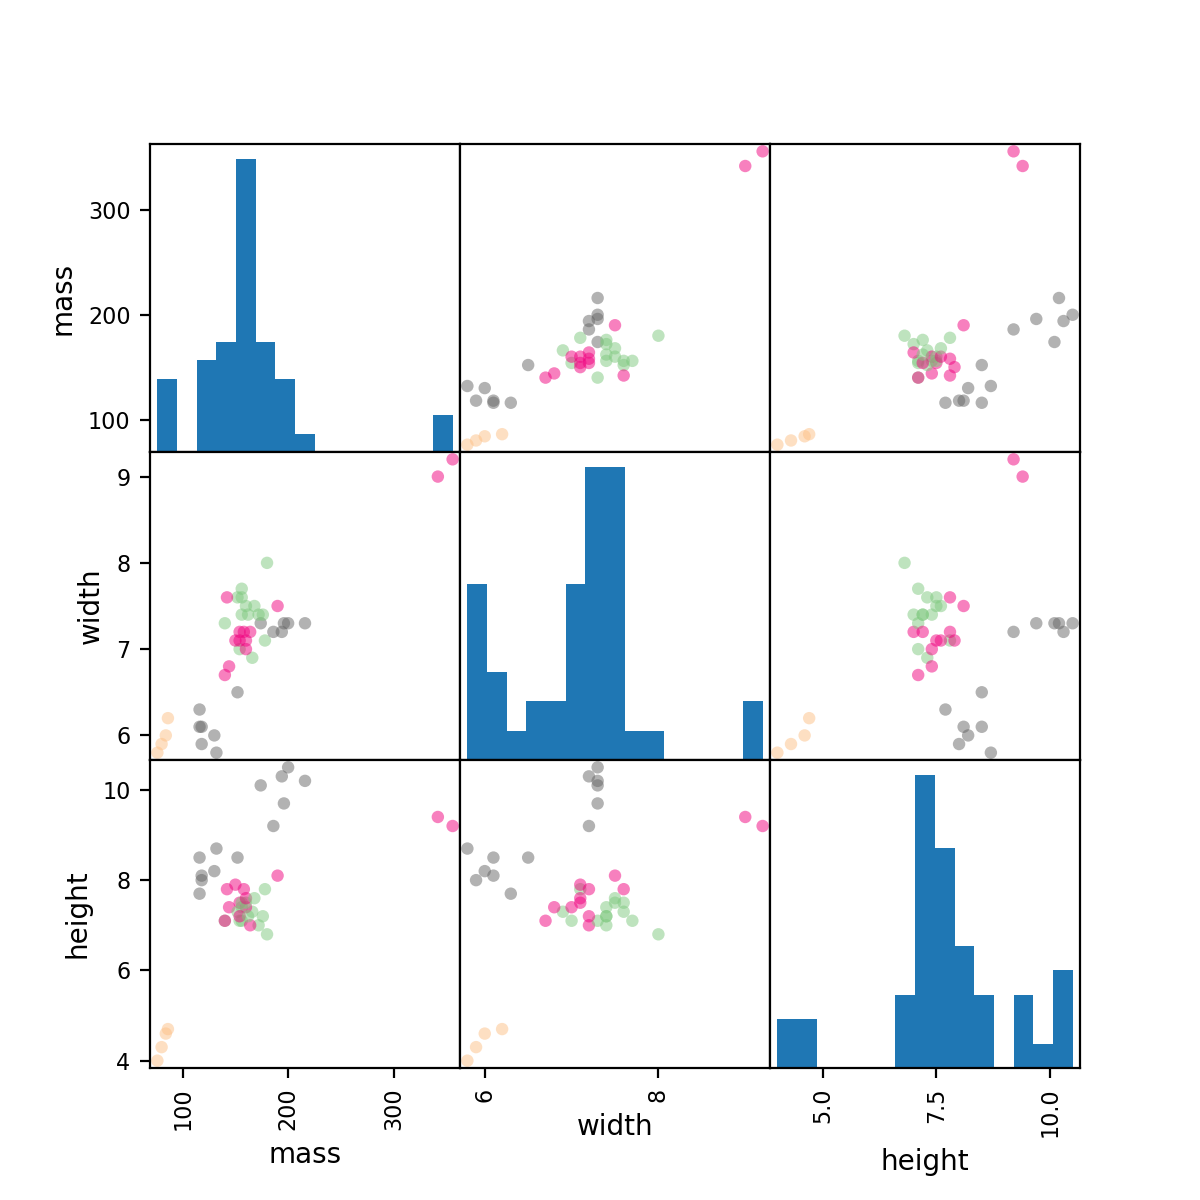

In [24]:
_ = pd.plotting.scatter_matrix(frame= X_train, figsize= (6,6), 
                               hist_kwds= {'bins' : 15}, c = y_train, 
                               marker = 'o', s = 20, cmap = cmap)

In [25]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


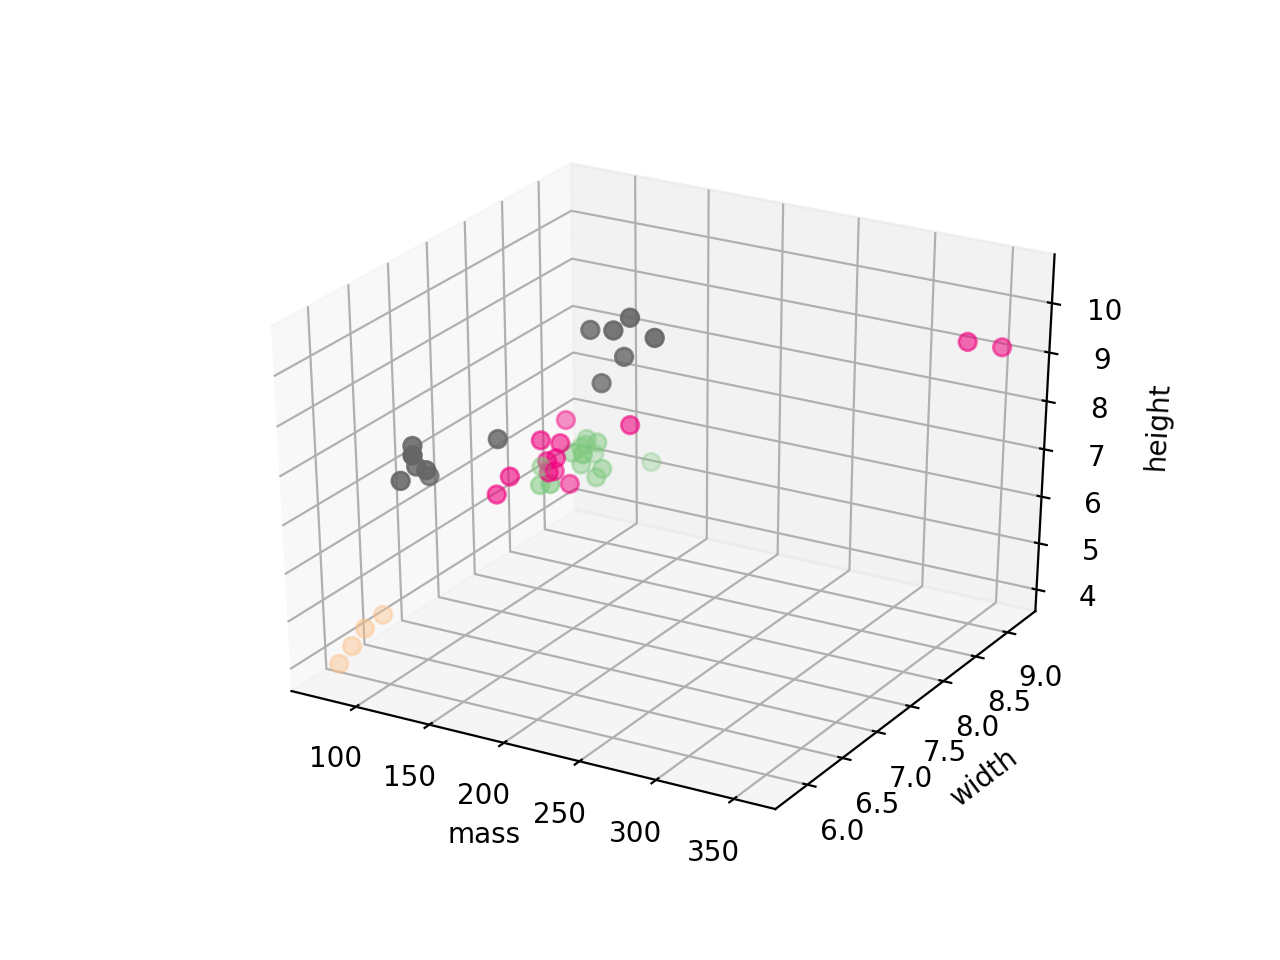

Text(0.5,0,'height')

In [48]:
import matplotlib.pyplot as plt
plt.figure()
ax = plt.subplot(111, projection = '3d')
ax.scatter(X_train['mass'], X_train['width'], X_train['height'], c= y_train, cmap = cmap, s = 40)
ax.set_xlabel('mass')
ax.set_ylabel('width')
ax.set_zlabel('height')

##### Inferences 
- mass and width may have some outliers. 
- height and width can could be predictors to sperate at least two categories. 

#### 6.4 kNN Classifier
- Memory based or instance based classifiers, i.e they kind of memorize training data and use this 
 memorization to classify new instances.   
- Can be used for both classification and regression  
 - The algorithm is as follows for classification :  
   Given a train set X_train, with labels y_train, and a new sample X_test to be scored.
   1. Compute the distance of X_test to all of points in X_train, select k nearest neighbors (x_NN). 
   2. Get the labels y_NN of x_NN 
   3. Use majority vote to pick a lable from y_NN to assign to the X_test

###### Decision Boundary   
If regions were plotted on a 2D scatter plot with two predictors, each region describing what label would be ascribed to a point it contains, based on kNN algorithm, then the boundaries b/w them are called decision boundaries. 
- kNN is interesting algorithm because it can learn non linear boundaries, even for k = 1 (check slides)

#### Parameters for algorithm 
- distance metric  
  -  typical is eucledian, which is a special case of minkowski distance (p=2)
- k 
- weighting of distance   
  - distances can be weighted unequally
- combining/aggregating method for all distances  
  - it is usually a majority vote. 


#### Create KneighborsClassifier object

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)

#### Train using fit method 
- Every Classifier object has a fit method that updates internal attributes of the object after learning

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Scoring/Predicting a new case 
- predict method in classifiers are useful for prediction 

In [29]:
p = knn.predict([[20,4.3,5.3]])
dic_fruitlabel_name[p[0]]

'mandarin'

In [30]:
p = knn.predict([[100,4.3,5.3]])
dic_fruitlabel_name[p[0]]

'lemon'

#### Evaluating using a metric on unseen data. 
- score method is useful 

In [31]:
knn.score(X_test, y_test)

0.53333333333333333

##### Plot decision boundary

In [35]:
import numpy
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
#import graphviz
from sklearn.tree import export_graphviz

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()

In [4]:
#import os 
#import sys
#module_path = os.path.abspath(os.path.join('..'))
#if module_path not in sys.path:
#    sys.path.append(module_path)
#from code.utils import plot_fruit_knn    

<IPython.core.display.Javascript object>


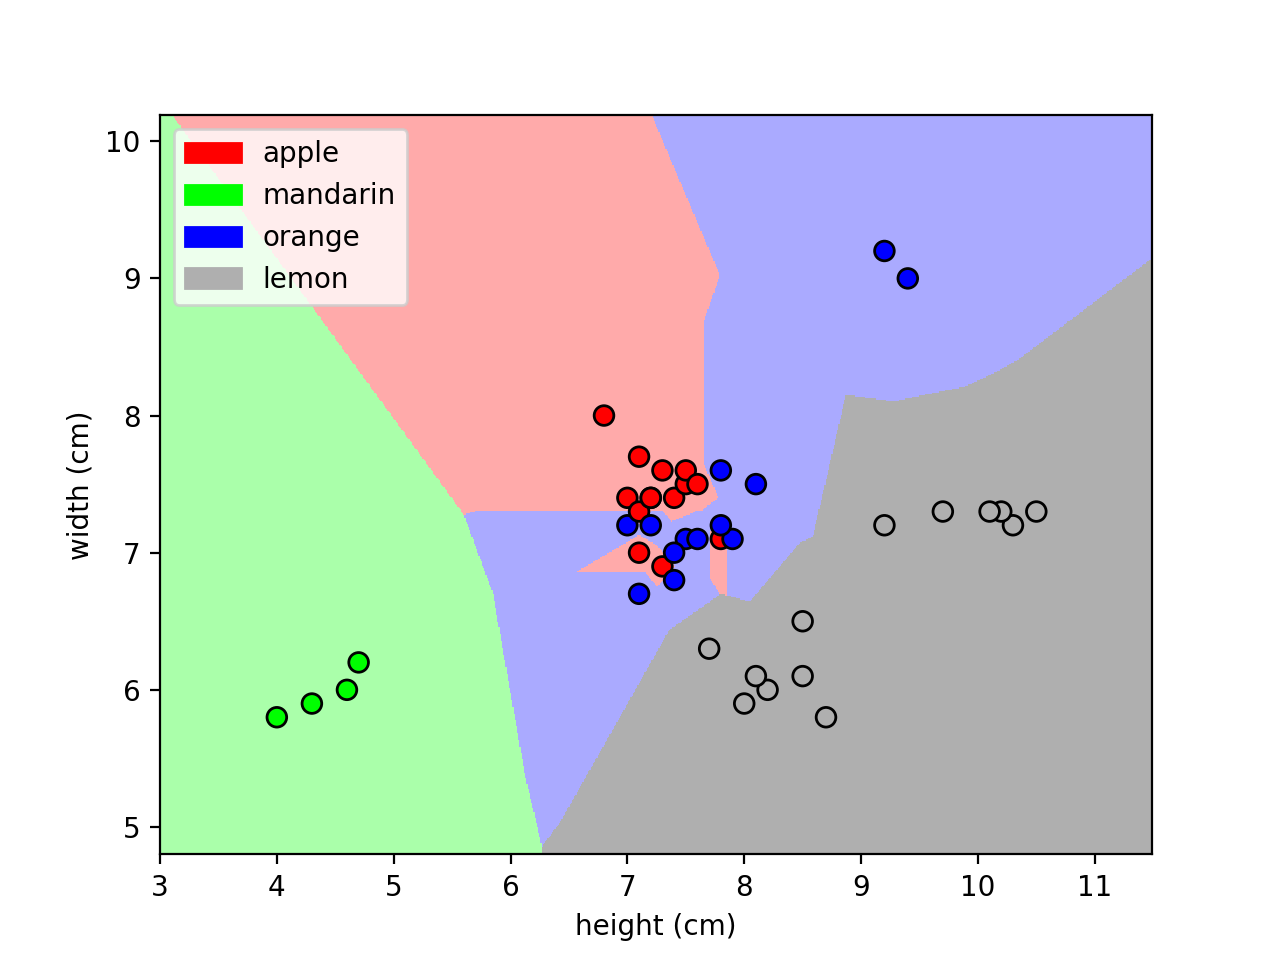

<IPython.core.display.Javascript object>


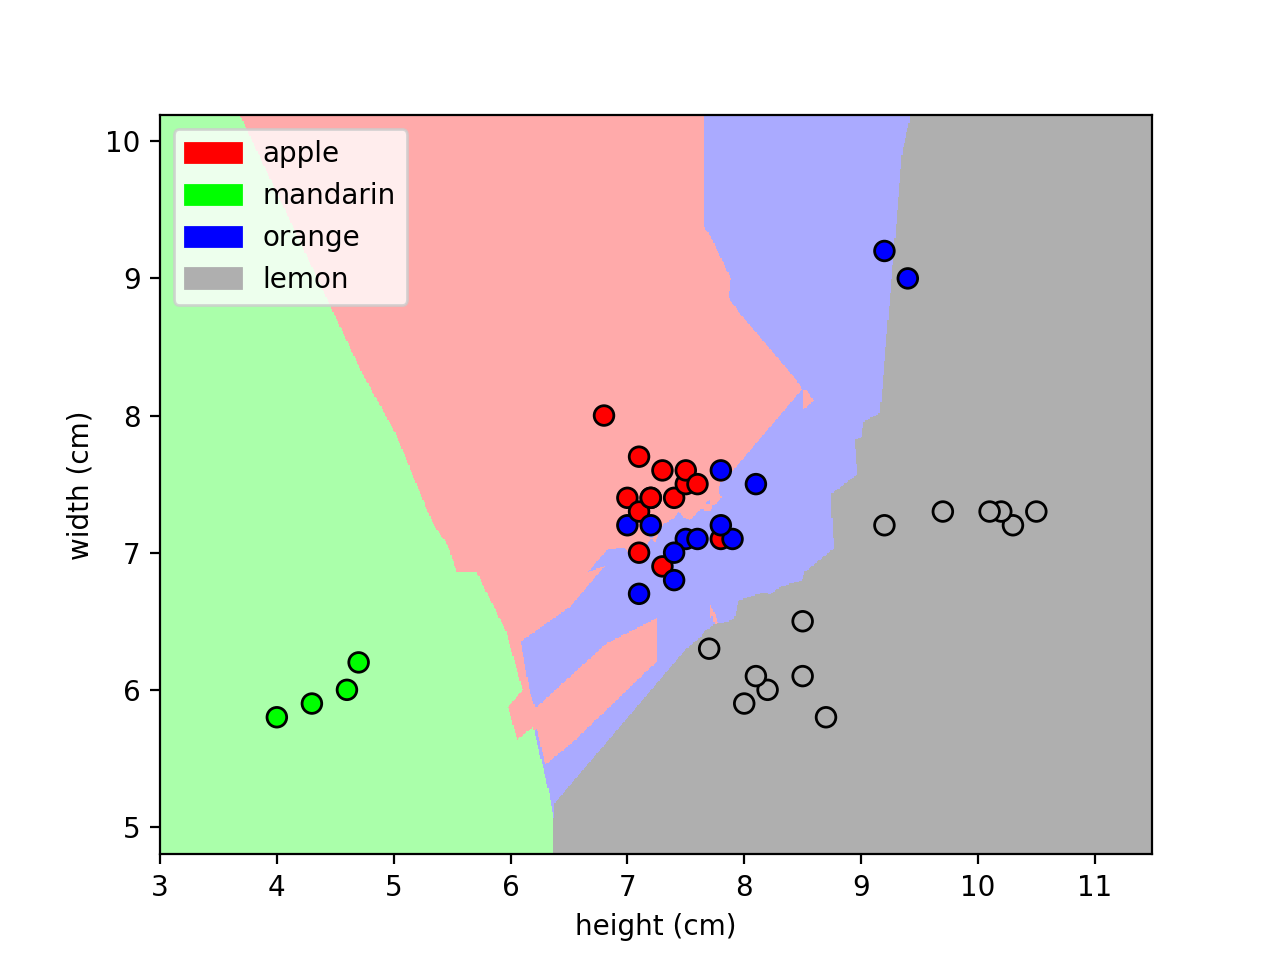

<IPython.core.display.Javascript object>


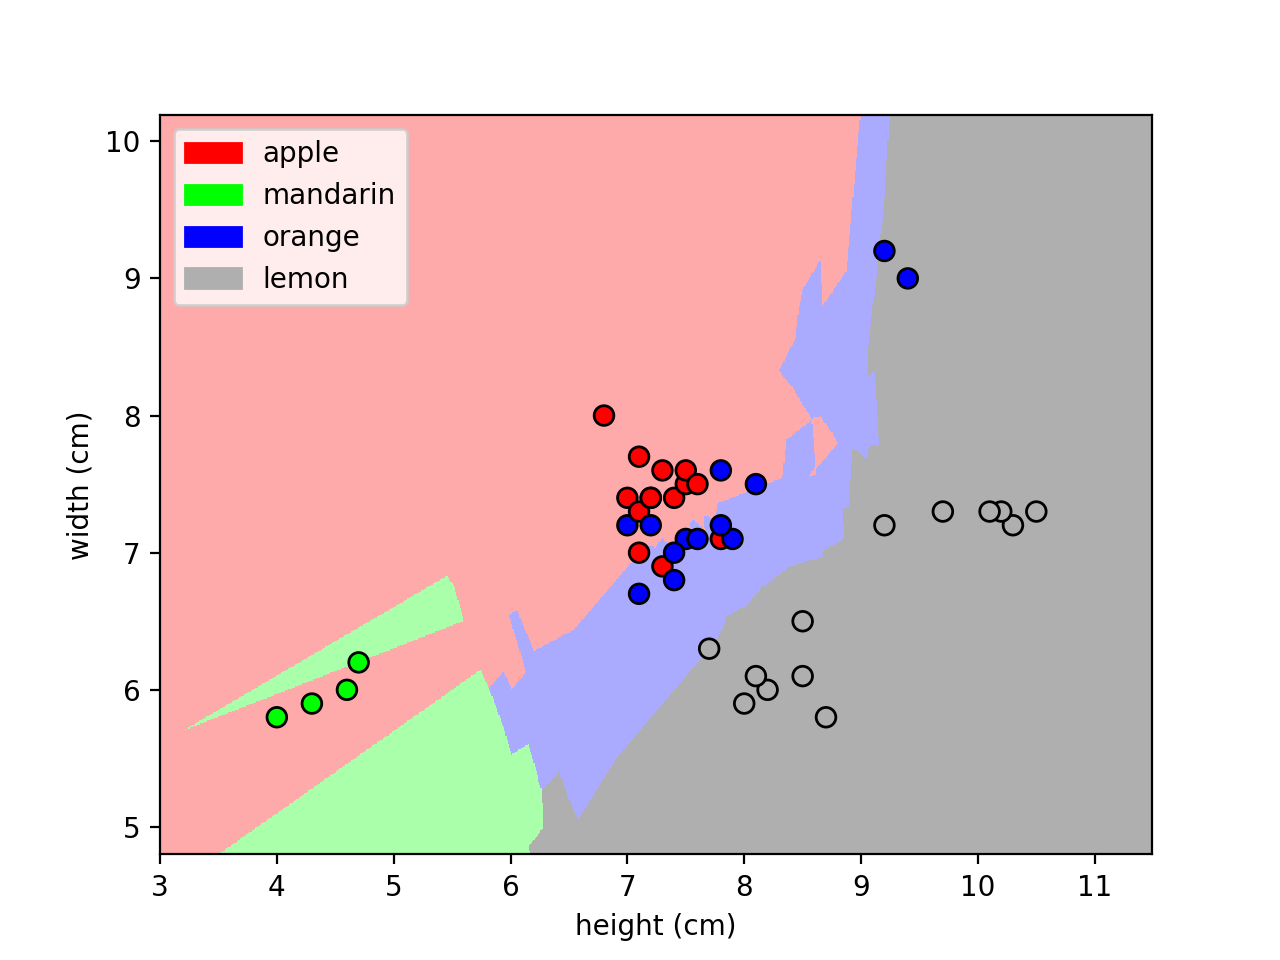

In [40]:
plot_fruit_knn(X_train, y_train,1 ,'uniform') # weights passed 'uniform', means all distances are treated equal
plot_fruit_knn(X_train, y_train,5 ,"uniform")
plot_fruit_knn(X_train, y_train,10 ,"uniform")

#### Bias Variance Tradeoff  & sensitivity of eval metric on k 
- Bias and Variance are two opposing causes that affect accuracy 
- Balancing them lets one achieve an acceptable accuracy 

The decision boundary plots above help understand bias variance tradeoff on accuracy / evaluation metric.  
- As k is small, the classifier uses information from every point, and potentially  picks up noise 
(outliers, mis-labeled data ). So, the bias in training is low (measures by training accuracy) but 
variance will be high, (accuracy on test set) will suffer  compared to training set. 
- As k increases, the decision boundaries become smoother, the training accuracy decreases (bias increases),
 but becomes comparable to that in test set (variance decreases)  
- **If one monitors the evaluation metric on train and test data, as the parameters of classifier are varied 
  one can choose parameters that give a balance b/w bias and variance, by choosing accuracy values that match in. 
  train and test**  

In [42]:
### Plot accuracy on train and test as a function of k 
k_list = np.arange(1,11,1)
train_acc = []
test_acc = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train , y_train)
    score_train = knn.score(X_train, y_train)
    score_test = knn.score(X_test, y_test)
    train_acc.append(score_train)
    test_acc.append(score_test)

<IPython.core.display.Javascript object>


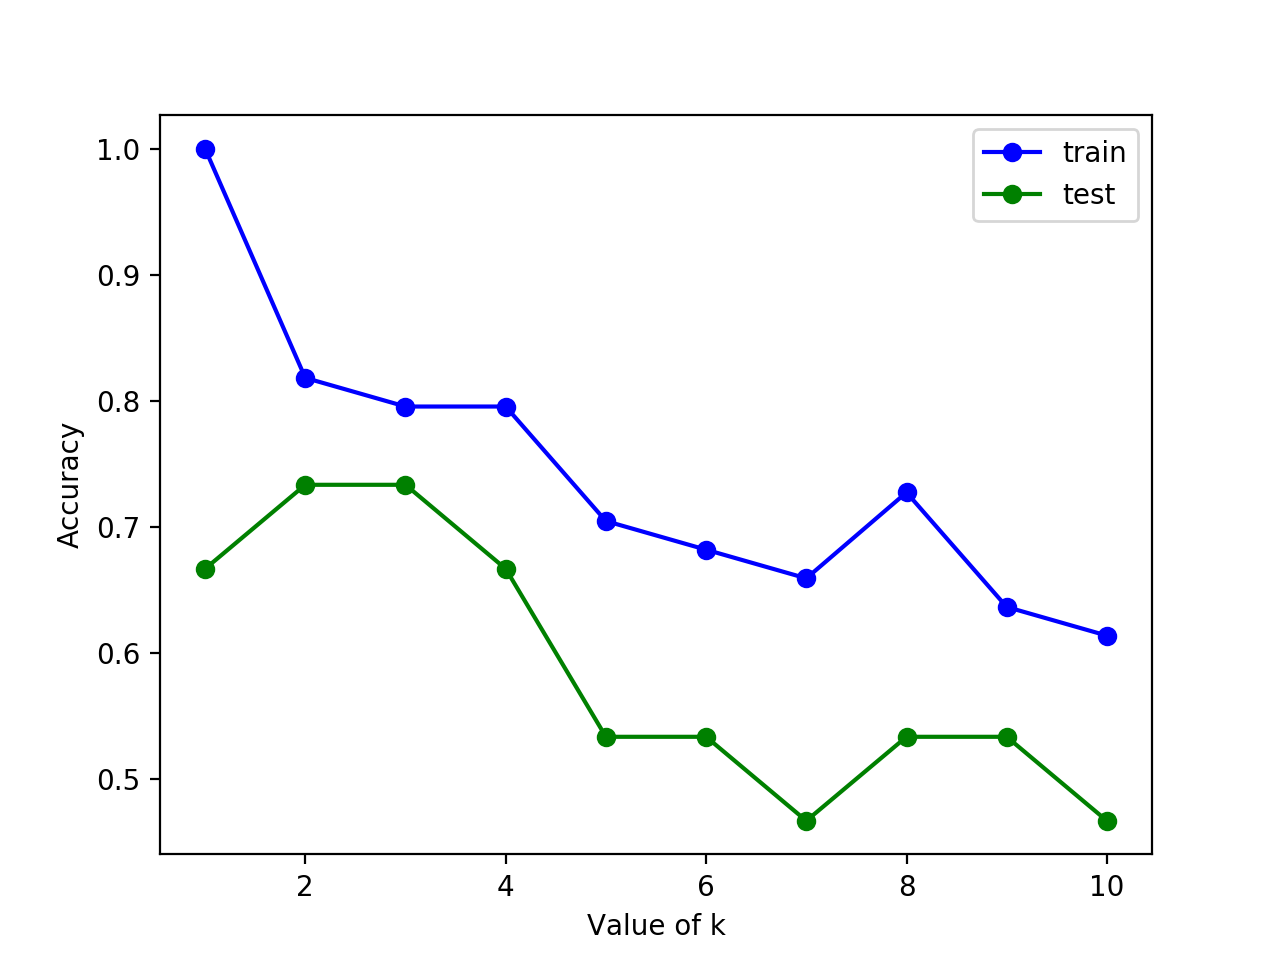

Text(0,0.5,'Accuracy')

In [47]:
plt.figure()
plt.plot(k_list, train_acc , 'bo-', label = 'train')
plt.plot(k_list, test_acc , 'go-',  label = 'test')
plt.legend()
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

### Reliability of tuning parameters / Sensitivity of accuracy metric on split of data
Our choice of k based on fixed train and test, means it could be dependent on data split. 
To overcome this, a good way is to perform this split a number of times and perform training and evaluation 
on all sets, and then see how mean accuracy varies with k to make a choice, this method is called cross-validation. 

Example : How evaluation metric varies with size of split of data

In [54]:
s = np.arange(0.1,1,0.1)
score = []
for prop in s:
    test_acc = []
    for i in range(1000):
        X_train, X_test, y_train,y_test =  train_test_split(X, y,train_size = (1-prop),  
                                                            test_size = prop)
                                                       
        knn = KNeighborsClassifier(n_neighbors= 3)
        knn.fit(X_train , y_train)
    #score_train = knn.score(X_train, y_train)
        score_test = knn.score(X_test, y_test)
        test_acc.append(score_test)
    score.append(np.mean(score_test))

<IPython.core.display.Javascript object>


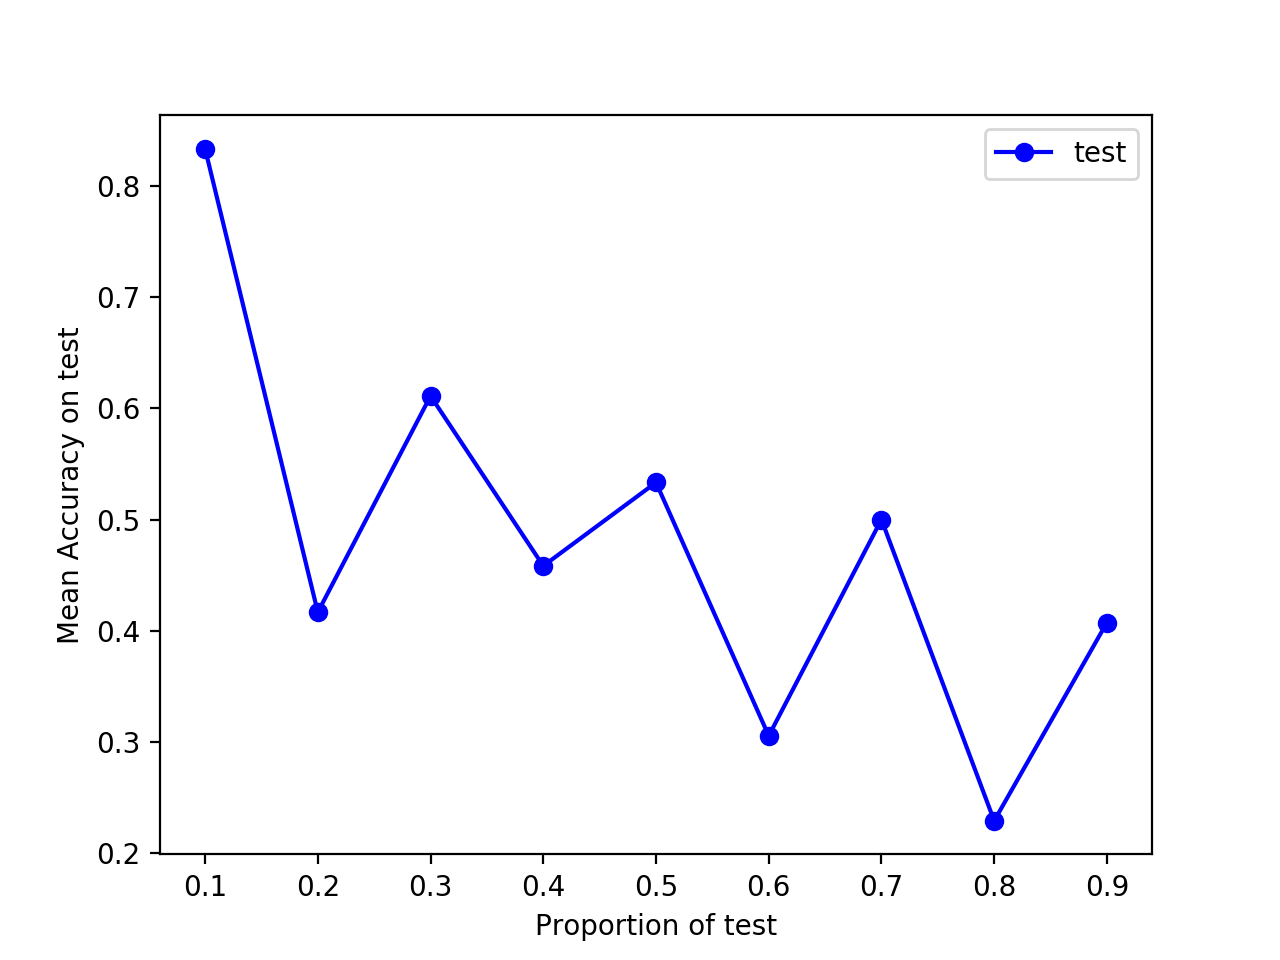

Text(0,0.5,'Mean Accuracy on test')

In [55]:
plt.figure()
plt.plot(s, score , 'bo-', label = 'test')
#plt.plot(k_list, test_acc , 'go-',  label = 'test')
plt.legend()
plt.xlabel('Proportion of test')
plt.ylabel('Mean Accuracy on test')

##### 7. Algorithmic Bias  
http://approximatelycorrect.com/2016/11/07/the-foundations-of-algorithmic-bias/

Article draws attention to how algorithms can learn purposefully or inadvertently to make biases in decision making. 
Some of the ways bias can creep in -
1. Data omission/ Incorrect sample selection 
   - Image model learns to predict a colored person as a gorilla
2. Biases in the processes that produce data  
   - Model to predict relapse to crime, could be racially biased, if biaes existed in capturing people of color 
  for crimes more than other racial segments of population
3. using models for decision making where they were not supposed to be used  
4. Surrogate objectives (clicks as surrogate for interest) 
   - Articles get more clicks if they are sensational content vs informative. Is click a good measure 
to consider when developing a model that predicts informative articles 